In [28]:
import pandas as pd
import pickle
from tqdm import tqdm
import warnings
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary
warnings.filterwarnings('ignore')
from gensim.models import CoherenceModel #coherence 모델 라이브러리
import matplotlib.pyplot as plt #그래프 그리기
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [15]:
# 클러스터링 파일 가져오기
with open('DX_Actor.pkl', 'rb') as f:
    df = pickle.load(f)

In [20]:
df_cluster0 = df[df['cluster'] == 0]
df_cluster0.head()
len(df_cluster0)

7998

In [21]:
# 단어 사전 만들기
all_documents = list(df_cluster0['tagged_content'])
dictionary = Dictionary(all_documents)
dictionary.token2id

{'가능하다': 0,
 '가지': 1,
 '개월': 2,
 '거': 3,
 '거나': 4,
 '겪다': 5,
 '결과': 6,
 '경향': 7,
 '경험': 8,
 '공유': 9,
 '교장': 10,
 '굴': 11,
 '궁금하다': 12,
 '그동안': 13,
 '그러하다': 14,
 '글': 15,
 '깊다': 16,
 '끄다': 17,
 '나오다': 18,
 '논의': 19,
 '놓다': 20,
 '누군가': 21,
 '느껴지다': 22,
 '단계': 23,
 '달': 24,
 '달라': 25,
 '당황': 26,
 '대해': 27,
 '동급생': 28,
 '동료': 29,
 '듣기': 30,
 '듣다': 31,
 '따르다': 32,
 '매우': 33,
 '맥락': 34,
 '메시지': 35,
 '모니터링': 36,
 '받다': 37,
 '방향': 38,
 '버리다': 39,
 '번': 40,
 '보내다': 41,
 '보다': 42,
 '불친절하다': 43,
 '사용': 44,
 '사항': 45,
 '살': 46,
 '새': 47,
 '선생님': 48,
 '세부': 49,
 '소아과': 50,
 '소유': 51,
 '손가락': 52,
 '솔직하다': 53,
 '싶다': 54,
 '쏘다': 55,
 '아니다': 56,
 '안녕': 57,
 '앉다': 58,
 '않다': 59,
 '약속': 60,
 '어려움': 61,
 '어린이집': 62,
 '엄마': 63,
 '여러': 64,
 '예상': 65,
 '오늘이': 66,
 '올라가다': 67,
 '올리다': 68,
 '외동': 69,
 '요즘': 70,
 '요청': 71,
 '위해': 72,
 '의사': 73,
 '이사': 74,
 '이야기': 75,
 '이유': 76,
 '일관': 77,
 '일반': 78,
 '입학': 79,
 '자다': 80,
 '자주': 81,
 '작업': 82,
 '잠복': 83,
 '잡다': 84,
 '장난감': 85,
 '적응하다': 86,
 '전환': 87,
 '점': 88,
 

In [22]:
corpus = []

for doc in all_documents :
    corpus.append(dictionary.doc2bow(doc)) 

In [23]:
# 3개의 토픽을 갖도록 LDA Modeling

topic_num = 3

ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                           num_topics=topic_num,
                                           id2word=dictionary,
                                           passes=20,
                                           iterations=50,
                                           random_state=42
                                          )

Topic 2 complete.
Topic 3 complete.
Topic 4 complete.
Topic 5 complete.
Topic 6 complete.
Topic 7 complete.
Topic 8 complete.
Topic 9 complete.


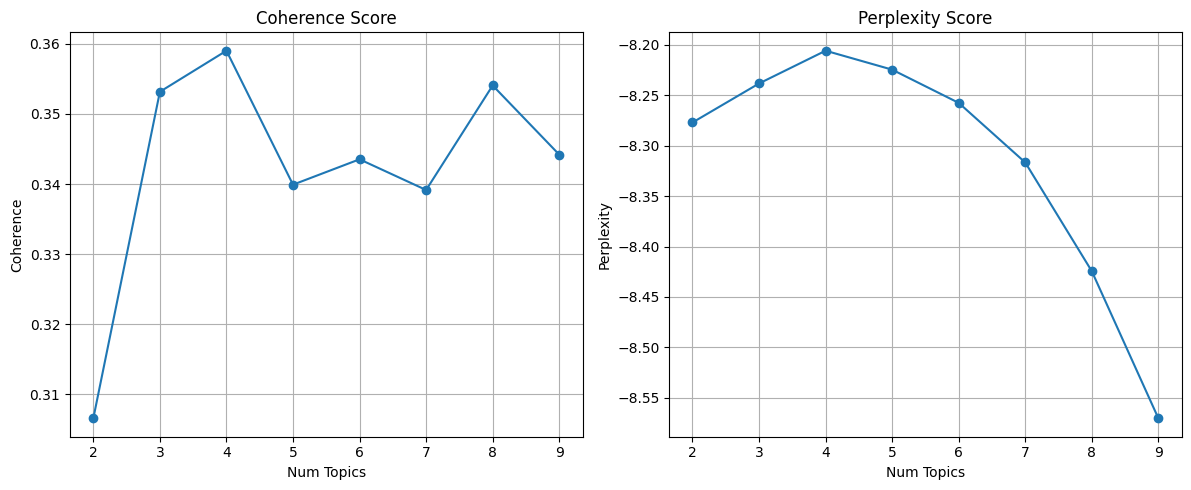

In [24]:
# 결과 저장 리스트
c_score = [] # Coherence
p_score = [] # Perplexity
# 토픽 개수 범위 (2 ~ 9)
start_topic = 2
end_topic = 10

for i in range(start_topic, end_topic):
    # 1. LDA 모델 생성
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, random_state=42)

    # 2. Coherence Score 계산
    coherencemodel = CoherenceModel(model=ldamodel, texts=df['tagged_content'], dictionary=dictionary, coherence='c_v')
    c_score.append(coherencemodel.get_coherence())

    # 3. Perplexity Score 계산
    p_score.append(ldamodel.log_perplexity(corpus))

    print(f"Topic {i} complete.")


# --- 시각화 (Coherence / Perplexity / Silhouette / Elbow) ---
x_range = range(start_topic, end_topic)

plt.figure(figsize=(24, 5))

# 1. Coherence (높을수록 좋음)
plt.subplot(1, 4, 1)
plt.plot(x_range, c_score, 'o-')
plt.title('Coherence Score')
plt.xlabel('Num Topics')
plt.ylabel('Coherence')
plt.grid(True)

# 2. Perplexity (낮을수록 좋음)
plt.subplot(1, 4, 2)
plt.plot(x_range, p_score, 'o-')
plt.title('Perplexity Score')
plt.xlabel('Num Topics')
plt.ylabel('Perplexity')
plt.grid(True)

plt.tight_layout()
plt.show()

In [34]:
print(c_score)
print(p_score)

[np.float64(0.30653789686339455), np.float64(0.3531726826296007), np.float64(0.35903467247752513), np.float64(0.3399053309055938), np.float64(0.34352806591583734), np.float64(0.33914644304766256), np.float64(0.3540726932465454), np.float64(0.34419740973668134)]
[np.float64(-8.276949474245638), np.float64(-8.23825566077085), np.float64(-8.205744800529995), np.float64(-8.224541463771706), np.float64(-8.257488416535084), np.float64(-8.316635086994689), np.float64(-8.424517706152857), np.float64(-8.570429795203903)]


In [35]:
topic_num = 4

ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                           num_topics=topic_num,
                                           id2word=dictionary,
                                           passes=20,
                                           iterations=50,
                                           random_state=42
                                          )

In [36]:
action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)) :
    label = []
    value = []
    for score in doc :
        label.append(score[0])
        value.append(score[1])
    max_index = np.argmax(value)
    action_n = label[max_index]
    action_align.append(action_n)

100%|████████████████████████████████████████████████████████████████████████████| 7998/7998 [00:07<00:00, 1024.76it/s]


In [37]:
df_cluster0['action_cluster'] = action_align

In [46]:
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)

pyLDAvis.save_html(prepared_data, 'ldavis_cluster0_4.html')

pyLDAvis.display(prepared_data)

In [39]:
topics = ldamodel.show_topics(num_topics=-1, formatted=True)

for topic_id, topic_desc in topics :
    print(f"Topic ID : {topic_id}, Description : {topic_desc}")

Topic ID : 0, Description : 0.008*"먹다" + 0.008*"보다" + 0.007*"좋다" + 0.007*"없다" + 0.006*"가다" + 0.006*"고양이" + 0.005*"않다" + 0.005*"오다" + 0.004*"집" + 0.004*"수"
Topic ID : 1, Description : 0.014*"수" + 0.014*"청각장애" + 0.013*"소리" + 0.009*"보다" + 0.009*"수어" + 0.008*"좋다" + 0.008*"들다" + 0.007*"사람" + 0.007*"않다" + 0.006*"말"
Topic ID : 2, Description : 0.024*"장애인" + 0.020*"수" + 0.009*"장애" + 0.007*"되어다" + 0.006*"위" + 0.006*"사회" + 0.006*"서비스" + 0.006*"않다" + 0.006*"지원" + 0.005*"기술"
Topic ID : 3, Description : 0.010*"않다" + 0.009*"말" + 0.009*"보다" + 0.009*"사람" + 0.009*"수" + 0.009*"없다" + 0.007*"영화" + 0.007*"아니다" + 0.007*"생각" + 0.006*"내"


In [ ]:
0 -> 3
1 -> 4
2 -> 2
3 -> 1

In [41]:
new_action_topic =[]

for i in tqdm(df_cluster0.action_cluster) :
    if i == 0 :
        n = 3
    elif i == 1:
        n = 4
    elif i == 2:
        n = 2
    else:
        n = 1
    new_action_topic.append(n)

100%|█████████████████████████████████████████████████████████████████████████| 7998/7998 [00:00<00:00, 1354191.97it/s]


In [42]:
df_cluster0.action_cluster = new_action_topic
df_cluster0.action_cluster.value_counts()

action_cluster
4    2427
1    2296
2    1808
3    1467
Name: count, dtype: int64

In [43]:
df_cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7998 entries, 8 to 21288
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   keyword         7998 non-null   object
 1   title           7998 non-null   object
 2   content         7998 non-null   object
 3   date            7998 non-null   object
 4   url             7998 non-null   object
 5   tagged_content  7998 non-null   object
 6   vector          7998 non-null   object
 7   cluster         7998 non-null   int64 
 8   action_cluster  7998 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 624.8+ KB


In [44]:
df_cluster0 = df_cluster0[['content', 'tagged_content','cluster','action_cluster']]
df_cluster0

,content,tagged_content,cluster,action_cluster
8,안녕 모두 처음 글을 올렸지만 오랫동안 잠복해 있던 우리 살 아이는 평소에 너무 착...,"[안녕, 처음, 글, 올리다, 잠복, 살, 평소, 착하다, 착하다, 요즘, 학교, ...",0,1
11,암호화폐는 여전히 많은 사람들이 이해하지 못하는 부분입니다. 가장 큰 긍정적인 점은...,"[암호, 화폐, 여전하다, 많다, 사람, 이해, 부분, 가장, 크다, 긍정, 점, ...",0,2
61,최근 청력 테스트를 받았습니다. 년 전부터 signia nx 보청기를 사용하고 있습...,"[최근, 청력, 테스트, 받다, 전, 보청기, 사용, 지금, 식당, 비행기, 시끄럽...",0,4
62,최근 청력 테스트를 받았습니다. 년 전부터 signia nx 보청기를 사용하고 있습...,"[최근, 청력, 테스트, 받다, 전, 보청기, 사용, 지금, 식당, 비행기, 시끄럽...",0,4
82,이게 회복이 가능한지 정말 좋아해요 통계뿐만 아니라 계부처장 언니이고 꽃 얘기도 많...,"[회복, 가능하다, 정말, 좋아하다, 통계, 아니다, 계, 부처, 언니, 꽃, 얘기...",0,2
...,...,...,...,...
21284,레알 격공이네요.... 집들이 전통문화..,"[레알, 격, 공이, 집들이, 전통문화]",0,3
21285,내 집의 비밀번호 찐친 농인들만의 공공재..,"[내, 집의, 비밀번호, 찌다, 친, 농인, 공공재]",0,3
21286,저도 비슷한 경험있었죠 얼마 전에 네일클래스배우러갔는데요 하필 장실이 복도맞은편에 ...,"[경험, 전, 클래스, 배우다, 가다, 하필, 장실, 복도, 맞은편, 수업, 장실,...",0,3
21287,청인 전화하면 청인은 전화벨 듣고 문 열어줌 농인 문자보내고 전화해도 진동 소리 못...,"[청, 전화하다, 청, 전화, 벨, 듣다, 문, 열다, 줌, 농인, 문자, 보내다,...",0,4


In [45]:
df_cluster0.to_csv('DX_actor0_action_4.csv', encoding = 'utf-8-sig')

In [47]:
with open('DX_actor0_action_4.pkl', 'wb') as f:
    pickle.dump(df_cluster0, f)